In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/co2-emission-by-vehicles/CO2 Emissions_Canada.csv
/kaggle/input/co2-emission-by-vehicles/Data Description.csv


<center>
<span style="font-family:cursive; color:green; font-size:50px; text-decoration: underline"> Ever wondered how much CO2 your car emits </span>
</center>    

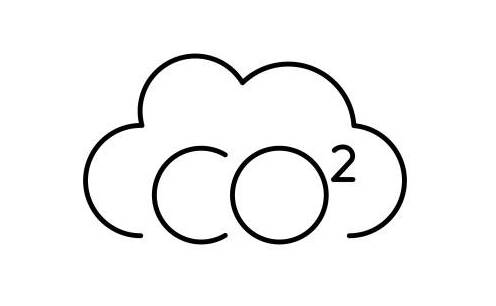

<center>
<span style="font-family:Courier New; color:pink; font-size:50px;"> About Dataset</span>
</center>    

<span style="font-family:Trebuchet MS; color:blue; font-size:20px;"> 
This dataset contains official record of CO2 emissions data by various car of different features.
There are total 7385 rows and 12 columns.<br>
The data has been taken and compiled from the below Canada Government official link
    </span><br>
https://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64#wb-auto-6

In [2]:
import pandas as pd
import numpy as np

# visualization libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# sklearn libraries
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

import pickle

import warnings
warnings.filterwarnings("ignore")

<span style="font-family:Courier New; color:pink; font-size:35px;"> Reading Data</span>

In [3]:
co2_emission_data= pd.read_csv("/kaggle/input/co2-emission-by-vehicles/CO2 Emissions_Canada.csv")

In [4]:
data= co2_emission_data.copy()
print("dataset shape :" ,data.shape)
data.head()

dataset shape : (7385, 12)


,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

<span style="font-family:Trebuchet MS; color:blue; font-size:20px;"> 
We can see that there are no missing values in our dataset.
    </span>

In [6]:
data.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


<span style="font-family:Courier New; color:pink; font-size:30px;"> This is how numerical features are distributed</span>

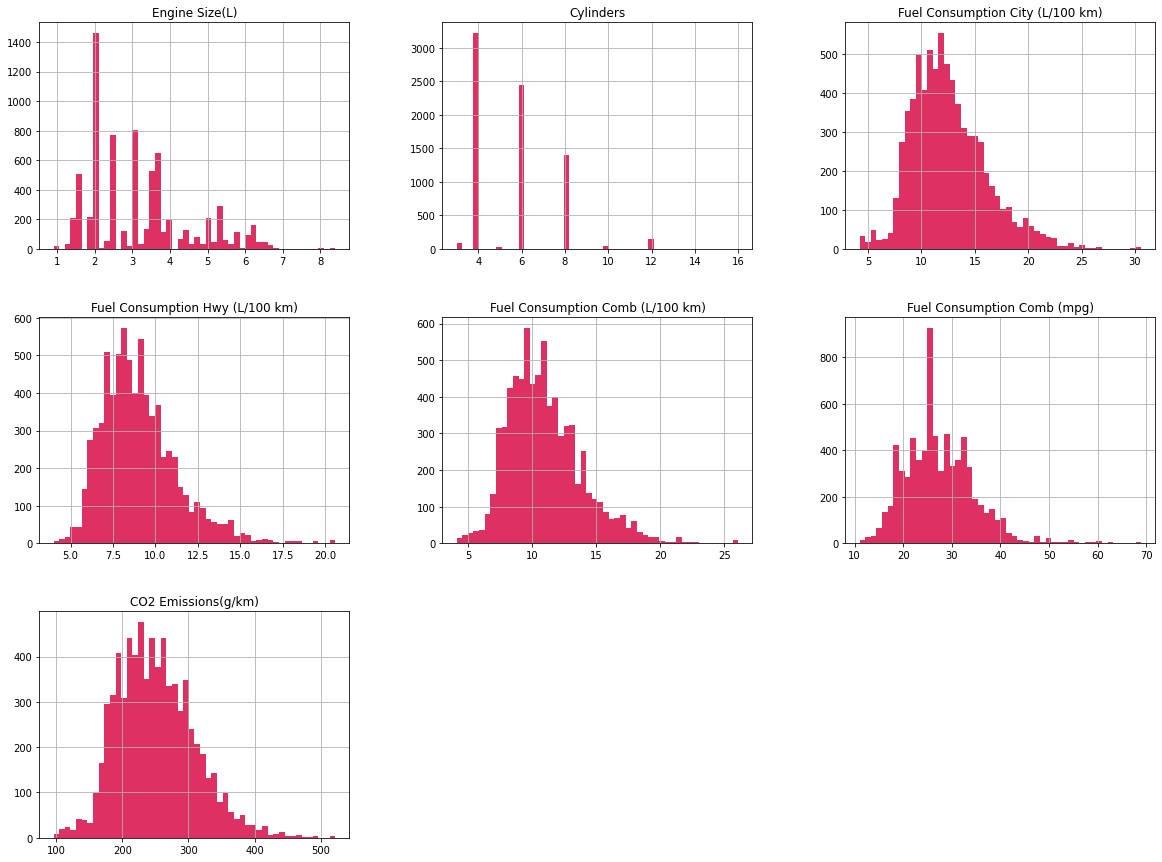

In [7]:
data.hist(bins= 50, figsize=(20,15), color="#DE3163")
plt.show()  

<span style="font-family:Courier New; color:pink; font-size:30px;"> Exploring Target-Features Relationship</span>

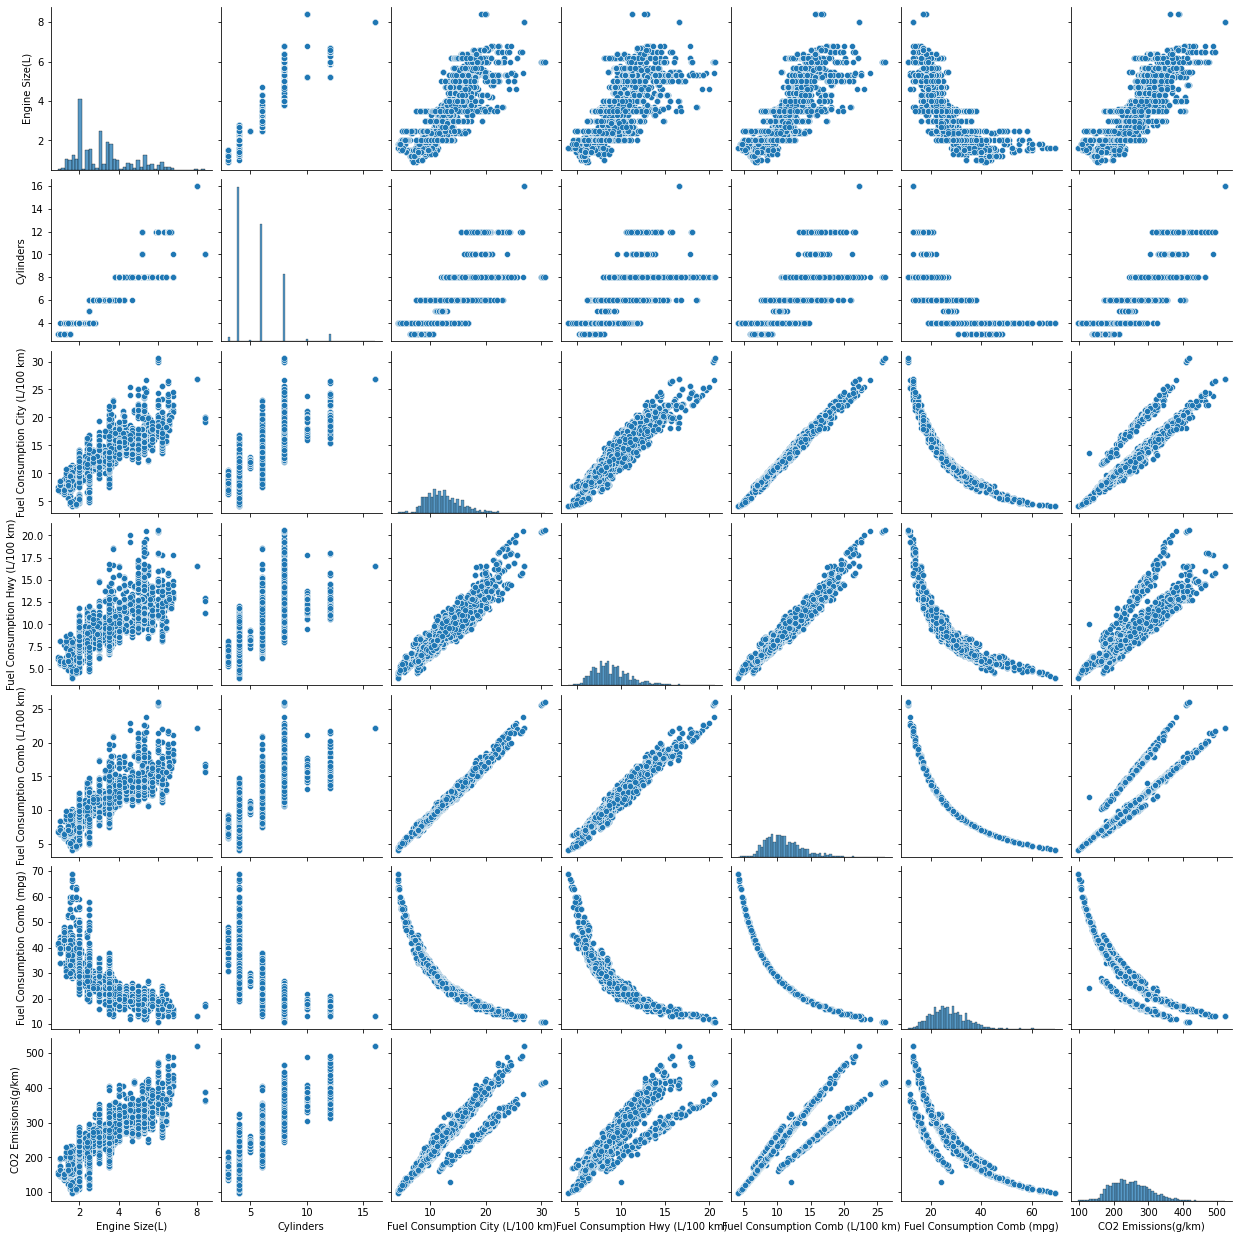

In [8]:
sns.pairplot(data)

<span style="font-family:Trebuchet MS; color:blue; font-size:20px;"> 
The above pair-plot shows Linear Relationship between features and target
    </span>

<AxesSubplot:>

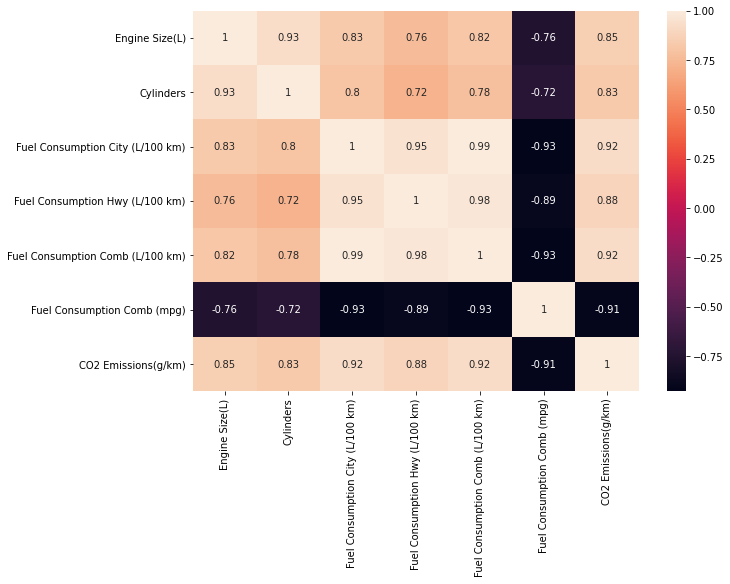

In [9]:
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(), annot=True)

<span style="font-family:Trebuchet MS; color:blue; font-size:20px;"> 
- Engine Size(L), Cylinders, Fuel Consumption City (L/100 km), Fuel Consumption Hwy (L/100 km) and Fuel Consumption Comb (L/100 km) are highly correlated to target<br>
- Fuel Consumption Comb (mpg) is negatively correlated to target
</span>

<span style="font-family:Courier New; color:pink; font-size:30px;"> 
Separating Target and Features
</span>

In [10]:
features= data[["Engine Size(L)", "Cylinders", "Fuel Type","Fuel Consumption Comb (L/100 km)" ]]
target= data[["CO2 Emissions(g/km)"]]

features.head()

,Engine Size(L),Cylinders,Fuel Type,Fuel Consumption Comb (L/100 km)
0,2.0,4,Z,8.5
1,2.4,4,Z,9.6
2,1.5,4,Z,5.9
3,3.5,6,Z,11.1
4,3.5,6,Z,10.6


<span style="font-family:Courier New; color:pink; font-size:30px;">Encoding Fuel Type</span>

In [11]:
features["Fuel Type"].unique()

array(['Z', 'D', 'X', 'E', 'N'], dtype=object)

<span style="font-family:Trebuchet MS; color:blue; font-size:20px;"> 
Since Fuel Type have six different class, one hot encoding would create so many columns, so we will Label encode it. 
    </span>

In [12]:
encoder= LabelEncoder()
features["Fuel Type"]= encoder.fit_transform(features["Fuel Type"])

# label encoded features
features.head(5)

,Engine Size(L),Cylinders,Fuel Type,Fuel Consumption Comb (L/100 km)
0,2.0,4,4,8.5
1,2.4,4,4,9.6
2,1.5,4,4,5.9
3,3.5,6,4,11.1
4,3.5,6,4,10.6


In [13]:
features["Fuel Type"].unique()

array([4, 0, 3, 1, 2])

In [14]:
# scaler= MinMaxScaler()
# scaled_features= scaler.fit_transform(features)
# scaled_features

In [15]:
# scaled_features= pd.DataFrame(scaled_features, columns= features.columns)
# scaled_features.head()

<span style="font-family:Courier New; color:pink; font-size:30px;">
Splitting Data into train and test
</span>

In [16]:
x_train, x_test, y_train, y_test= train_test_split(features, target, test_size=0.2, random_state=10)

<span style="font-family:Courier New; color:pink; font-size:30px;">Linear Regression</span>

In [17]:
# initializing regressor
regressor= LinearRegression()

# model fitting
regressor.fit(x_train, y_train)

LinearRegression()

<span style="font-family:Courier New; color:pink; font-size:30px;">Evaluating Regression Model</span>

In [18]:
y_train_predicted= regressor.predict(x_train)
y_test_predicted= regressor.predict(x_test)

print("RMSE for train_data :", np.sqrt(mean_squared_error(y_train, y_train_predicted)))
print("RMSE for test_data :", np.sqrt(mean_squared_error(y_test, y_test_predicted)))

RMSE for train_data : 18.39257592804017
RMSE for test_data : 19.711174047275765


Text(0.5, 1.0, 'evaluating Train data')

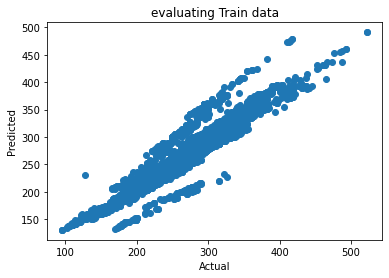

In [19]:
plt.scatter(y_train, y_train_predicted)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("evaluating Train data")

Text(0.5, 1.0, 'evaluating Test data')

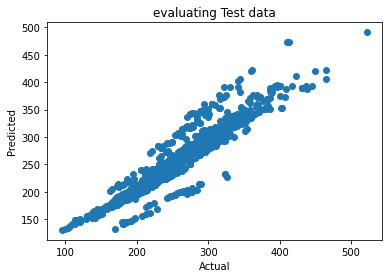

In [20]:
plt.scatter(y_test, y_test_predicted)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("evaluating Test data")

<span style="font-family:Courier New; color:pink; font-size:30px;">Decision Tree Regressor</span>

In [21]:
model= DecisionTreeRegressor()

# model fitting
model.fit(x_train, y_train)

# model evaluation
y_train_predicted= model.predict(x_train)
y_test_predicted= model.predict(x_test)

print("RMSE for train_data :", np.sqrt(mean_squared_error(y_train, y_train_predicted)))
print("RMSE for test_data :", np.sqrt(mean_squared_error(y_test, y_test_predicted)))

RMSE for train_data : 2.0577323382191897
RMSE for test_data : 2.855941496045139


Text(0.5, 1.0, 'evaluating Train data')

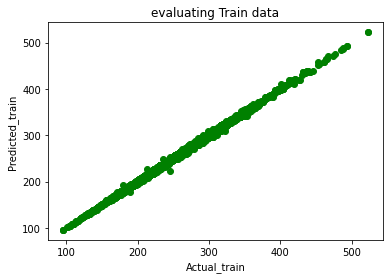

In [22]:
plt.scatter(y_train, y_train_predicted, color="green")
plt.xlabel("Actual_train")
plt.ylabel("Predicted_train")
plt.title("evaluating Train data")

Text(0.5, 1.0, 'evaluating Test data')

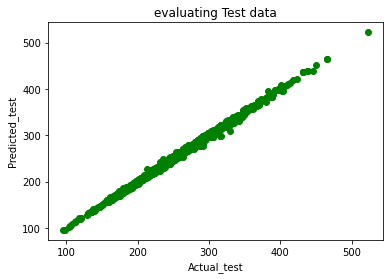

In [23]:
plt.scatter(y_test, y_test_predicted, color="green")
plt.xlabel("Actual_test")
plt.ylabel("Predicted_test")
plt.title("evaluating Test data")

<span style="font-family:Trebuchet MS; color:blue; font-size:20px;"> 
From the above Scatter Plot and RMSE score, it can be concluded that Decision Tree is a better regressor
    </span>

In [24]:
# opening a file to store this model data
file= open("decision_tree_regressor.pkl", "wb")

# dump information to that file
pickle.dump(model, file)